In [1]:
from pathlib import Path
import json
import pandas as pd
from collections import defaultdict
from tqdm.autonotebook import tqdm
import numpy as np

/tmp/ipykernel_958543/878498492.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
downsample_results_dir = Path("/data/dzeiberg/mave_calibration/sc/arion/projects/pejaverlab/users/zeibed01/mave_calibration/downsample_results_10_12_24/")

In [3]:
dataset_id = "Matreyek_PTEN_VampSeq_pipeline_A"
proportions = [".0625", ".125", ".25", ".5"]

In [4]:
proportions

['.0625', '.125', '.25', '.5']

In [5]:
proportion_dirs = defaultdict(list)
for iter_dir in downsample_results_dir.glob("iter*"):
    for prop in proportions:
        propdir = downsample_results_dir / iter_dir / f"downsample_{prop}/"
        if propdir.exists():
            df_files = list(propdir.glob(f"*{dataset_id}*.json"))
            if len(df_files):
                proportion_dirs[prop].extend(df_files)

In [6]:
{k : len(v) for k, v in proportion_dirs.items()}

{'.0625': 4882, '.125': 4680, '.25': 4796, '.5': 4955}

In [7]:
results = defaultdict(list)
for prop, files in tqdm(proportion_dirs.items()):
    for result_file in tqdm(files):
        with open(result_file) as f:
            result = json.load(f)
            if (result['sample_order'] == ['P/LP','B/LB','gnomAD','synonymous']):
                result['weights'] = np.array(result['weights'])
                result['sample_indicators'] = np.array(result['sample_indicators'])
                result['observations'] = np.array(result['observations'])
                if not result['weights'].shape[0]:
                    raise ValueError(f"empty weights: {result_file}")
                    continue
                results[prop].append(result)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4882 [00:00<?, ?it/s]

  0%|          | 0/4680 [00:00<?, ?it/s]

  0%|          | 0/4796 [00:00<?, ?it/s]

  0%|          | 0/4955 [00:00<?, ?it/s]

In [8]:
{k : len(v) for k, v in results.items()}

{'.0625': 4882, '.125': 4680, '.25': 4796, '.5': 4955}

In [9]:
from utils.threshold_utils import get_score_threshold

In [11]:
threshold_results = {}

rng = np.arange(-1, 2,0.01)
for prop, fits in tqdm(results.items()):
    tp,tb,priors,_, _,_ = get_score_threshold(rng, fits, control_sample_idx=1,parallel=True,return_all=False,point_values=[1,2,4,8])
    threshold_results[prop] = (tp,tb,priors)

  0%|          | 0/4 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 128 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 

/home/dzeiberg/miniconda3/envs/mave/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1634: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.1s
[Paralle

In [12]:
import matplotlib.pyplot as plt

In [13]:
threshold_results['.5']

(array([0.48, 0.45, 0.37,  nan]),
 array([nan, nan, nan, nan]),
 array([0.22761328, 0.11294761, 0.34469836, ..., 0.1294439 , 0.20277462,
        0.31689616]))

In [19]:
# thresholdsP = np.load(f"/data/dzeiberg/mave_calibration/figs_10_09_24/{dataset_id}/Tau_p.npy").reshape((1,-1))
# thresholdsP = thresholdsP[:,[0,1,3,7]]
# thresholdsB = np.load(f"/data/dzeiberg/mave_calibration/figs_10_09_24/{dataset_id}/Tau_b.npy").reshape((1,-1))
# thresholdsB = thresholdsB[:,[0,1,3,7]]
# for prop in proportions[::-1]:
#     tp,tb,priors = threshold_results[prop]
#     thresholdsP = np.concatenate([thresholdsP, tp.reshape((1,-1))], axis=0)
#     thresholdsB = np.concatenate([thresholdsB, tb.reshape((1,-1))], axis=0)

thresholdsP = np.load(f"/data/dzeiberg/mave_calibration/figs_10_09_24/{dataset_id}/Tau_p.npy").reshape((1,-1))
thresholdsP = thresholdsP[:,[0,1,3,7]]
thresholdsB = np.load(f"/data/dzeiberg/mave_calibration/figs_10_09_24/{dataset_id}/Tau_b.npy").reshape((1,-1))
thresholdsB = thresholdsB[:,[0,1,3,7]]
Prior = [np.load(f"/data/dzeiberg/mave_calibration/figs_10_09_24/{dataset_id}/priors.npy")]
for prop in proportions[::-1]:
    tp,tb,priors = threshold_results[prop]
    thresholdsP = np.concatenate([thresholdsP, tp.reshape((1,-1))], axis=0)
    thresholdsB = np.concatenate([thresholdsB, tb.reshape((1,-1))], axis=0)
    Prior.append(priors)

In [20]:
thresholdsP

array([[0.49045362, 0.48483205, 0.46796733,        nan],
       [0.48      , 0.45      , 0.37      ,        nan],
       [0.48      , 0.45      , 0.37      ,        nan],
       [0.49      , 0.45      , 0.37      ,        nan],
       [0.49      , 0.45      , 0.37      , 0.19      ]])

In [21]:
thresholdsB

array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])

In [22]:
fracs = np.array([1, .5, .25, .125, .0625])

(0.0, 1.0)

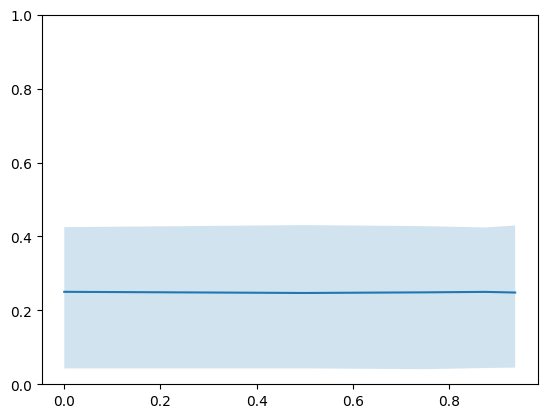

In [23]:
plt.plot(1-fracs, [np.median(Priors_k) for Priors_k in Prior], label="Prior")
fills = np.concatenate([np.percentile(Priors_k, [2.5, 97.5]).reshape((1,2)) for Priors_k in Prior], axis=0).T
plt.fill_between(1-fracs, *fills, alpha=0.2)
plt.ylim(0,1)

In [29]:
thresholdsP

array([[0.49045362, 0.48483205, 0.46796733,        nan],
       [0.48      , 0.45      , 0.37      ,        nan],
       [0.48      , 0.45      , 0.37      ,        nan],
       [0.49      , 0.45      , 0.37      ,        nan],
       [0.49      , 0.45      , 0.37      , 0.19      ]])

In [31]:
np.stack(thresholdsP).T

array([[0.49045362, 0.48      , 0.48      , 0.49      , 0.49      ],
       [0.48483205, 0.45      , 0.45      , 0.45      , 0.45      ],
       [0.46796733, 0.37      , 0.37      , 0.37      , 0.37      ],
       [       nan,        nan,        nan,        nan, 0.19      ]])

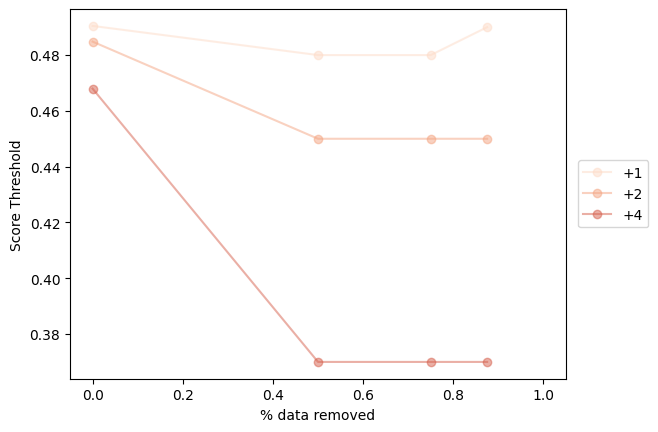

In [32]:
codes = """#b2182b
#d6604d
#f4a582
#fddbc7
#d1e5f0
#92c5de
#4393c3
#2166ac""".split("\n")[::-1]

for i,(point, thresholds) in list(enumerate(zip([1,2,4,8],np.stack(thresholdsB).T)))[::-1]:
    if np.isnan(thresholds[:-1]).all():
        continue
    plt.plot(1-fracs[:len(thresholdsB)-1],thresholds[:-1],label=f"-{point}",marker='o',color=codes[3-i])

for j,(point, thresholds) in enumerate(zip([1,2,4,8],np.stack(thresholdsP).T),start=4):
    if np.isnan(thresholds[:-1]).all():
        continue
    plt.plot(1-fracs[:len(thresholdsP)-1],thresholds[:-1],label=f"+{point}",marker='o',color=codes[j],alpha=0.5)

plt.legend(loc='center right',bbox_to_anchor=(1.18,0.5))
plt.xlabel("% data removed")
plt.ylabel("Score Threshold")
plt.xlim(-.05,1.05)
plt.savefig("/data/dzeiberg/mave_calibration/Matreyek_PTEN_VampSeq_pipeline_A_downsample_experiment.png",bbox_inches='tight',dpi=300)